In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
raw_data = sns.load_dataset("titanic")
raw_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
raw_data.describe(include = "all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_data['age'].fillna(value =raw_data['age'].mean(), inplace = True)

In [5]:
raw_data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Select features for modeling

In [6]:
data = raw_data[['pclass','sex','age','fare','survived']]
data.head()

,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [7]:
df = data.copy()
df['sex'] = df['sex'].map({'male':0,'female':1})

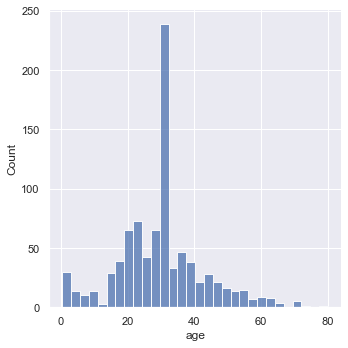

In [8]:
sns.displot(data = df,x='age')
plt.show()

In [9]:
df['age'] = df['age'].apply(lambda x:(x-df['age'].mean())/df['age'].std())
df['fare'] = df['fare'].apply(lambda x:(x-df['fare'].mean())/df['fare'].std())

In [10]:
df.describe()

,pclass,sex,age,fare,survived
count,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000
mean,2.308642,0.352413,2.272780e-16,-1.196200e-17,0.383838
std,0.836071,0.477990,1.000000e+00,1.000000e+00,0.486592
min,1.000000,0.000000,-2.251891e+00,-6.480577e-01,0.000000
25%,2.000000,0.000000,-5.921480e-01,-4.888737e-01,0.000000
50%,3.000000,0.000000,0.000000e+00,-3.571902e-01,0.000000
75%,3.000000,1.000000,4.076970e-01,-2.423274e-02,1.000000
max,3.000000,1.000000,3.868699e+00,9.661740e+00,1.000000


### Logistic Regression from Statsmodels

In [11]:
y= df['survived']
x1= df.drop(columns =('survived'))

In [12]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.451877
         Iterations 6


In [13]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Mon, 01 Mar 2021   Pseudo R-squ.:                  0.3214
Time:                        17:56:11   Log-Likelihood:                -402.62
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.888e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0884      0.300      3.623      0.000       0.500       1.677
pclass        -1.1501      0.135     -8.504      0.000      -1.415      -0.885
sex            2.6071      0.187     13.915      0.000       2.240       2.974
age           -0.4322      0.096     -4.507      0.000      -0.620      -0.244
fare           0.0287      0.101      0.284      0.777      -0.170       0.227
==============================================================================
"""

In [14]:
#p_value for fare is 0.777 & is > 0.005 means is not significant,  I remove from my features

In [15]:
x2= df.drop(columns =["survived","fare"])

In [16]:
x = sm.add_constant(x2)
reg_log= sm.Logit(y,x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.451923
         Iterations 6


In [17]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Mar 2021   Pseudo R-squ.:                  0.3213
Time:                        17:56:11   Log-Likelihood:                -402.66
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.450e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1272      0.267      4.215      0.000       0.603       1.651
pclass        -1.1685      0.119     -9.824      0.000      -1.402      -0.935
sex            2.6120      0.187     13.997      0.000       2.246       2.978
age           -0.4346      0.096     -4.549      0.000      -0.622      -0.247
==============================================================================
"""

### Logistic Regression from Sklearn

In [18]:
y= df['survived']
x1= df.drop(columns =('survived'))

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x1,y,test_size = 0.20,random_state = 42)

In [35]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

In [36]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [37]:
predictions = log_model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[89, 16],
       [20, 54]])

In [40]:
log_model.score(X_test,y_test)

0.7988826815642458

In [44]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(log_model, x1, y, cv=5))

[0.79329609 0.78089888 0.78651685 0.7752809  0.80337079]
